In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
# font to use in Slide Deck

font = {'family': 'calibri',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

default_color = sb.color_palette()[0]

In [3]:
dfr = pd.read_csv('chart.csv')
dfr.head()

,Fiscal Period Ending,Revenue Estimate_Bil,Rev_YoY_Growth,OperatingLoss_Bil,Operating Cash Flow,Operating Cash Flow_m,Rev_YoY_Growth.1
0,Dec-13,0.04,-,-,NaN,NaN,-
1,Dec-14,0.31,629%,-0.11,NaN,NaN,NaN
2,Dec-15,1.01,225%,-0.49,NaN,NaN,NaN
3,Dec-16,1.71,69%,-0.50,NaN,NaN,NaN
4,Dec-17,2.40,40%,-0.57,NaN,NaN,NaN


In [4]:
dfe = pd.read_csv('ecommercerank.csv')
dfe.head()

,Rank,CompanyName,Revenue_Bil_TAM_100B,TradeCount
0,1,Naver,1.50,22.8
1,2,Coupang,11.97,19.3
2,3,eBay Korea,1.80,17.1
3,4,11th St,0.60,9.7
4,5,Wemap,0.50,6.5


In [5]:
dfc = pd.read_csv('cashbalance.csv')
dfc.head()

,up_to_date,Cash Balance,Amount_M$,New Business Launched
0,2018-11,Vision Fund Invested,"2,000",Rocket Delivery upgrade
1,2018-12,Cash Balance,574,Coupang Eats
2,2019-12,Cash Balance,"1,222",Coupang Play
3,2020-12,Cash Balance,"1,251",NaN
4,2021-3,IPO,"3,400",NaN


In [6]:
dfr

,Fiscal Period Ending,Revenue Estimate_Bil,Rev_YoY_Growth,OperatingLoss_Bil,Operating Cash Flow,Operating Cash Flow_m,Rev_YoY_Growth.1
0,Dec-13,0.04,-,-,NaN,NaN,-
1,Dec-14,0.31,629%,-0.11,NaN,NaN,NaN
2,Dec-15,1.01,225%,-0.49,NaN,NaN,NaN
3,Dec-16,1.71,69%,-0.50,NaN,NaN,NaN
4,Dec-17,2.40,40%,-0.57,NaN,NaN,NaN
5,Dec-18,3.95,65%,-1.05,-0.694,-694.0,NaN
6,Dec-19,6.27,59%,-0.64,-0.311,-311.0,-55%
7,Dec-20,11.97,91%,-0.52,0.301,301.0,-197%
8,Dec-21,19.19,60%,-1.14,0.100,100.0,-67%
9,Dec-22,26.96,40%,-0.9,0.301,301.0,201%


In [7]:
drop = np.arange(12, 18, 1)
drop

dfr = dfr.drop(index = drop)

In [8]:
dfr['Revenue Estimate_Bil']

0      0.04
1      0.31
2      1.01
3      1.71
4      2.40
5      3.95
6      6.27
7     11.97
8     19.19
9     26.96
10    33.95
11    35.48
Name: Revenue Estimate_Bil, dtype: float64

In [9]:
dfr['OperatingLoss_Bil'].replace('-', np.NaN, inplace = True)
dfr['Rev_YoY_Growth'].replace('-', 'Start', inplace = True)

In [10]:
dfr['OperatingLoss_Bil'] = pd.to_numeric(dfr['OperatingLoss_Bil'])

In [11]:
dfr['OperatingLoss_Bil']

0      NaN
1    -0.11
2    -0.49
3    -0.50
4    -0.57
5    -1.05
6    -0.64
7    -0.52
8    -1.14
9    -0.90
10   -0.50
11    0.00
Name: OperatingLoss_Bil, dtype: float64

In [12]:
dfr['Rev_YoY_Growth']

0     Start
1      629%
2      225%
3       69%
4       40%
5       65%
6       59%
7       91%
8       60%
9       40%
10      26%
11       5%
Name: Rev_YoY_Growth, dtype: object

In [13]:
dfr['Rev_YoY_Growth'].shape[0]

12

In [14]:
labels = ['{}'.format(v) for v in dfr['Rev_YoY_Growth']]
labels 

['Start',
 '629%',
 '225%',
 '69%',
 '40%',
 '65%',
 '59%',
 '91%',
 '60%',
 '40%',
 '26%',
 '5%']

In [15]:
value = dfr['Rev_YoY_Growth']

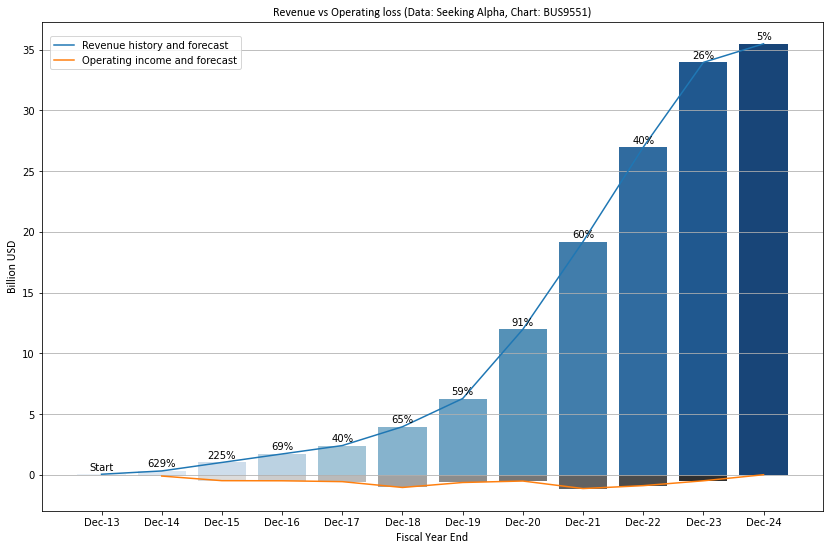

In [16]:
plt.figure(figsize = [14,9])

plt.errorbar(x = dfr['Fiscal Period Ending'], y = dfr['Revenue Estimate_Bil'], label = 'Revenue history and forecast')
sb.barplot(data = dfr, x = 'Fiscal Period Ending',  y = dfr['Revenue Estimate_Bil'], palette = 'Blues')
sb.barplot(data = dfr, x = 'Fiscal Period Ending',  y = dfr['OperatingLoss_Bil'], palette = 'Greys')
plt.errorbar(x = dfr['Fiscal Period Ending'], y = dfr['OperatingLoss_Bil'], label = 'Operating income and forecast')
plt.legend(bbox_to_anchor=(0.01,0.97), loc = 'upper left', borderaxespad = 0)

for i in range(dfr['Rev_YoY_Growth'].shape[0]):
    count = labels[i]
    plt.text(i, dfr['Revenue Estimate_Bil'][i] + 1, labels[i], ha = 'center', va = 'top')


plt.title('Revenue vs Operating loss (Data: Seeking Alpha, Chart: BUS9551)', fontdict = font)
plt.xlabel('Fiscal Year End', fontdict = font)
plt.ylabel('Billion USD', fontdict = font)

plt.grid(axis='y')
plt.show()

In [17]:
dfe

,Rank,CompanyName,Revenue_Bil_TAM_100B,TradeCount
0,1,Naver,1.50,22.8
1,2,Coupang,11.97,19.3
2,3,eBay Korea,1.80,17.1
3,4,11th St,0.60,9.7
4,5,Wemap,0.50,6.5


In [18]:
dfe.columns

Index(['Rank', 'CompanyName', ' Revenue_Bil_TAM_100B ', 'TradeCount'], dtype='object')

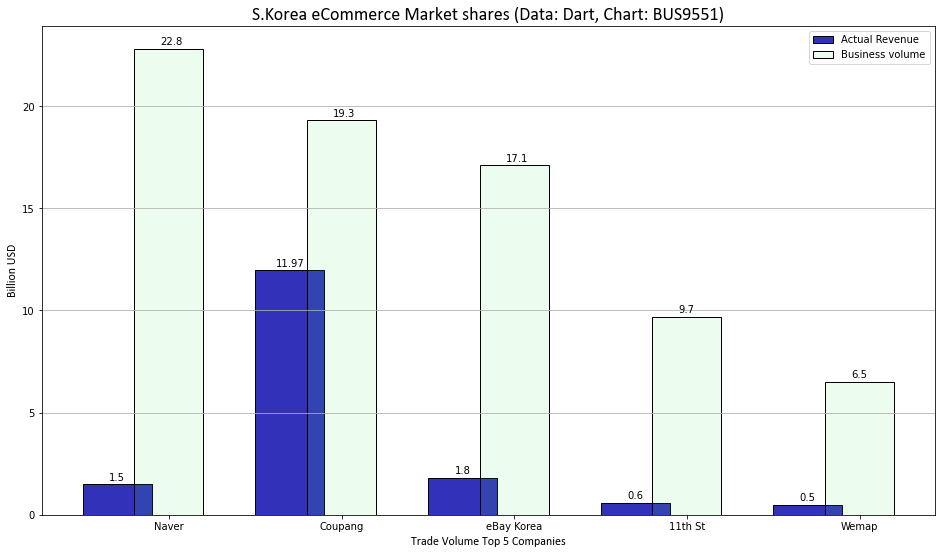

In [19]:
plt.figure(figsize = [16,9])

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = dfe[' Revenue_Bil_TAM_100B ']
 
# Choose the height of the cyan bars
bars2 = dfe['TradeCount']
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = 1/2.5, color = (0.1,0.1,0.7,0.9), edgecolor = 'black', capsize=7, label='Actual Revenue')
for i in range(dfe['TradeCount'].shape[0]):
    count = dfe['TradeCount'][i]
    plt.text(i + 0.25, dfe['TradeCount'][i] + 0.6, dfe['TradeCount'][i], ha = 'left', va = 'top') 
        
# Create cyan bars
plt.bar(r2, bars2, width = 1/2.5, color = (0.3,0.9,0.4,0.1), edgecolor = 'black', capsize=7, label='Business volume')
for i in range(dfe[' Revenue_Bil_TAM_100B '].shape[0]):
    count = dfe[' Revenue_Bil_TAM_100B '][i]
    plt.text(i, dfe[' Revenue_Bil_TAM_100B '][i] + 0.6, dfe[' Revenue_Bil_TAM_100B '][i], ha = 'center', va = 'top')  
    
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Naver', 'Coupang', 'eBay Korea', '11th St', 'Wemap'])

plt.title('S.Korea eCommerce Market shares (Data: Dart, Chart: BUS9551)', fontdict = font, fontsize = 18)
plt.xlabel('Trade Volume Top 5 Companies', fontdict = font)
plt.ylabel('Billion USD', fontdict = font)


plt.legend()
plt.grid(axis='y') 
    
# Show graphic
plt.show()

In [20]:
cash = dfr.copy()

In [21]:
cash

,Fiscal Period Ending,Revenue Estimate_Bil,Rev_YoY_Growth,OperatingLoss_Bil,Operating Cash Flow,Operating Cash Flow_m,Rev_YoY_Growth.1
0,Dec-13,0.04,Start,NaN,NaN,NaN,-
1,Dec-14,0.31,629%,-0.11,NaN,NaN,NaN
2,Dec-15,1.01,225%,-0.49,NaN,NaN,NaN
3,Dec-16,1.71,69%,-0.50,NaN,NaN,NaN
4,Dec-17,2.40,40%,-0.57,NaN,NaN,NaN
5,Dec-18,3.95,65%,-1.05,-0.694,-694.0,NaN
6,Dec-19,6.27,59%,-0.64,-0.311,-311.0,-55%
7,Dec-20,11.97,91%,-0.52,0.301,301.0,-197%
8,Dec-21,19.19,60%,-1.14,0.100,100.0,-67%
9,Dec-22,26.96,40%,-0.90,0.301,301.0,201%


In [22]:
drop = np.arange(0, 5, 1)
drop

array([0, 1, 2, 3, 4])

In [23]:
cash = cash.drop(index = drop)

In [24]:
cash

,Fiscal Period Ending,Revenue Estimate_Bil,Rev_YoY_Growth,OperatingLoss_Bil,Operating Cash Flow,Operating Cash Flow_m,Rev_YoY_Growth.1
5,Dec-18,3.95,65%,-1.05,-0.694,-694.0,NaN
6,Dec-19,6.27,59%,-0.64,-0.311,-311.0,-55%
7,Dec-20,11.97,91%,-0.52,0.301,301.0,-197%
8,Dec-21,19.19,60%,-1.14,0.100,100.0,-67%
9,Dec-22,26.96,40%,-0.90,0.301,301.0,201%
10,Dec-23,33.95,26%,-0.50,0.600,600.0,99%
11,Dec-24,35.48,5%,0.00,0.900,900.0,50%


In [25]:
cash = cash.reset_index()

In [26]:
labels = ['{:0.0f}'.format(v) for v in cash['Operating Cash Flow_m']]
labels 

['-694', '-311', '301', '100', '301', '600', '900']

In [27]:
cash['Operating Cash Flow_m']

0   -694.0
1   -311.0
2    301.0
3    100.0
4    301.0
5    600.0
6    900.0
Name: Operating Cash Flow_m, dtype: float64

In [28]:
dfr['Revenue Estimate_Bil']

0      0.04
1      0.31
2      1.01
3      1.71
4      2.40
5      3.95
6      6.27
7     11.97
8     19.19
9     26.96
10    33.95
11    35.48
Name: Revenue Estimate_Bil, dtype: float64

In [29]:
dfr['Revenue Estimate_Bil'][1]

0.31

In [30]:
cash['Operating Cash Flow_m']

0   -694.0
1   -311.0
2    301.0
3    100.0
4    301.0
5    600.0
6    900.0
Name: Operating Cash Flow_m, dtype: float64

In [31]:
cash['Operating Cash Flow_m'][1]

-311.0

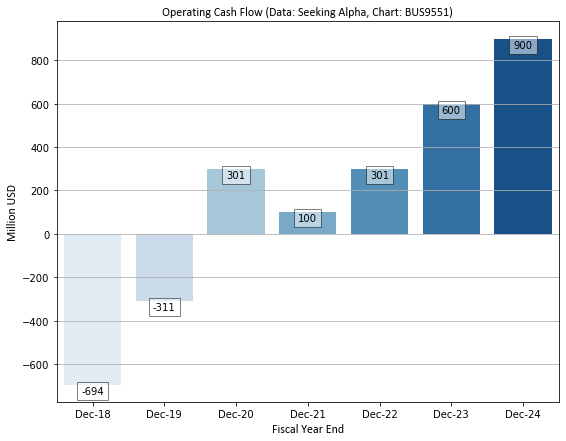

In [32]:
plt.figure(figsize = [9,7])
# plt.errorbar(x = cash['Fiscal Period Ending'], y = cash['Operating Cash Flow_m'], label = 'Revenue history and forecast')

sb.barplot(data = cash, x = 'Fiscal Period Ending',  y = cash['Operating Cash Flow_m'], palette = 'Blues')
# plt.legend(bbox_to_anchor=(0.01,0.97), loc = 'upper left', borderaxespad = 0)

for i in range(cash['Operating Cash Flow_m'].shape[0]):
     plt.text(i, cash['Operating Cash Flow_m'][i]-5, labels[i], ha = 'center', va = 'top', bbox=dict(facecolor='white', alpha=0.5))


plt.title('Operating Cash Flow (Data: Seeking Alpha, Chart: BUS9551)', fontdict = font)
plt.xlabel('Fiscal Year End', fontdict = font)
plt.ylabel('Million USD', fontdict = font)

plt.grid(axis='y')
plt.show()